Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 75.21560302507629%


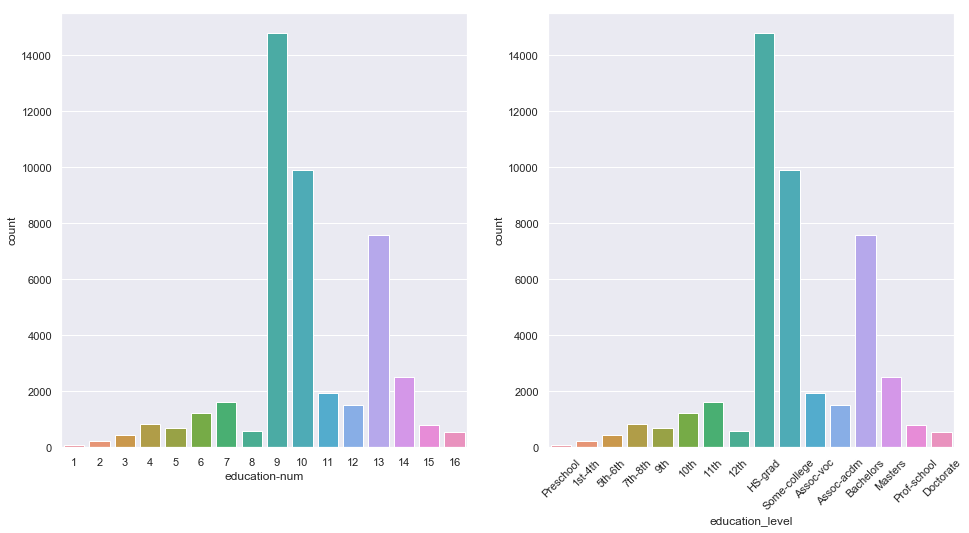

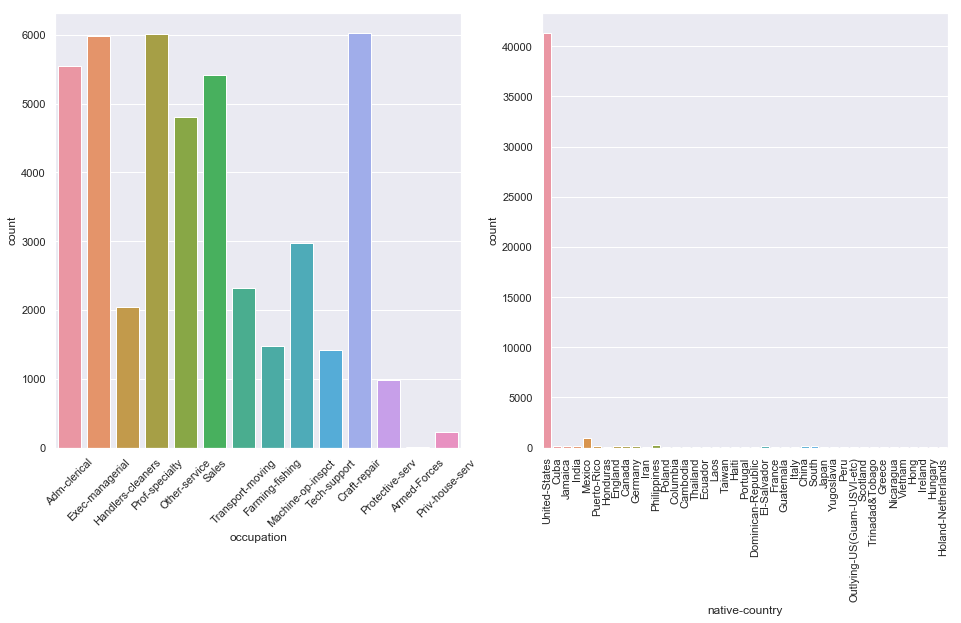

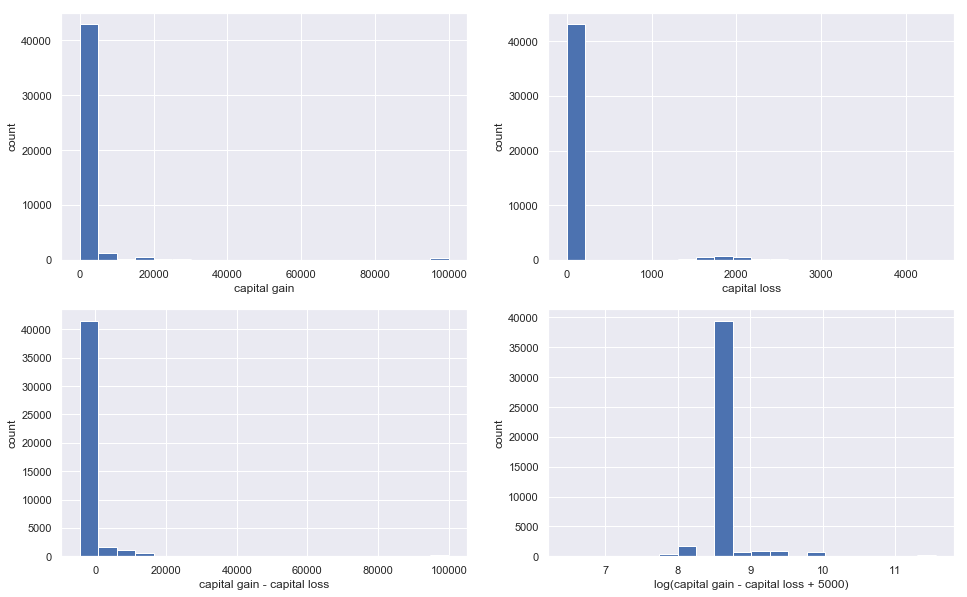

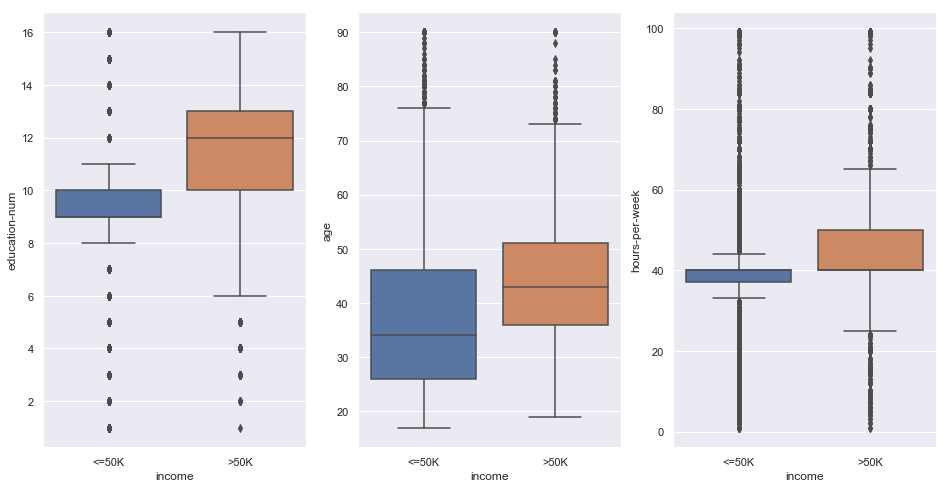

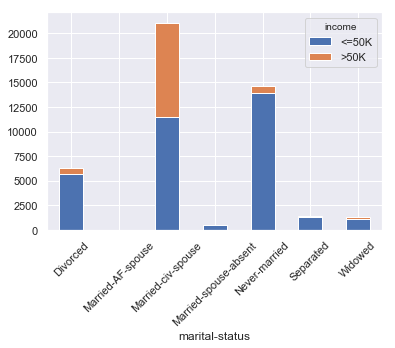

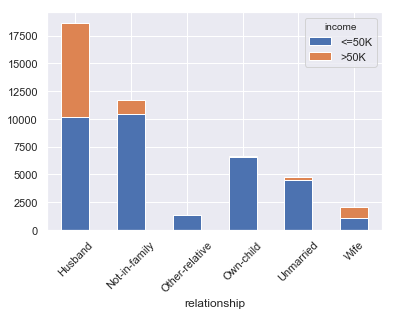

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("./census.csv", skipinitialspace=True)

# simple statistics
n_records = data.shape[0]
n_greater_50k = data[data.income==">50K"].shape[0]
n_at_most_50k = data[data.income=="<=50K"].shape[0]
greater_percent = n_at_most_50k/n_records*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

# check if any missing data
#print(data.apply(lambda x: sum(x.isnull()), axis=0))

# check if any redundant categories
#print(data['education_level'].value_counts())
#print(data['education-num'].value_counts())
#print(data['native-country'].value_counts())

fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
sns.countplot(data['education-num'].astype(int))
fig.add_subplot(1, 2, 2)
sns.countplot(data['education_level'],
              order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
              '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 
              'Assoc-acdm', 'Bachelors','Masters', 'Prof-school', 'Doctorate'])
plt.xticks(rotation=45)
plt.show()

fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
sns.countplot(data['occupation'])
plt.xticks(rotation=45)
fig.add_subplot(1, 2, 2)
sns.countplot(data['native-country'])
plt.xticks(rotation=90)
plt.show()

# check if any relation between two features
data['capital-diff'] = data['capital-gain'] - data['capital-loss'] 

fig = plt.figure(figsize = (16,10))
fig.add_subplot(2, 2, 1)
data['capital-gain'].hist(bins=20)
plt.xlabel("capital gain")
plt.ylabel("count")
fig.add_subplot(2, 2, 2)
data['capital-loss'].hist(bins=20)
plt.xlabel("capital loss")
plt.ylabel("count")
fig.add_subplot(2, 2, 3)
data['capital-diff'].hist(bins=20)
plt.xlabel("capital gain - capital loss")
plt.ylabel("count")
fig.add_subplot(2, 2, 4)
data['capital-diff'].apply(lambda x: np.log(x + 5000)).hist(bins=20)
plt.xlabel("log(capital gain - capital loss + 5000)")
plt.ylabel("count")
plt.show()

# plot income vs. numerical features
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1, 3, 1)
sns.boxplot(x = 'income', y='education-num', data=data)
fig.add_subplot(1, 3, 2)
sns.boxplot(x = 'income', y='age', data=data)
fig.add_subplot(1, 3, 3)
sns.boxplot(x = 'income', y='hours-per-week', data=data)
plt.show()

# check if any relevant categories
#print(data['marital-status'].value_counts())
#print(data['relationship'].value_counts())

#fig.add_subplot(1, 2, 1)
ct = pd.crosstab(data['marital-status'], data['income'])
ct.plot.bar(stacked=True)
plt.xticks(rotation=45)
#fig.add_subplot(1, 2, 2)
ct = pd.crosstab(data['relationship'], data['income'])
ct.plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.show()
